# Truco - Análise de Probabilidades

## Introdução

Truco é um jogo da baralho que utiliza 40 cartas, seguindo a seguinte ordem crescente de poder: 4, 5, 6, 7, Q, J, K, A, 2, 3.

Geralmente é jogado entre 3 a 6 jogadores, cada qual recebe 3 cartas, e se dividem em equipes com o objetivo de vencer 2 de 3 rounds. Ganha o round a equipe que jogar a carta mais alta.

Cada partida equivale a um ponto e ganha a equipe que fizer 12 pontos. O valor de uma partida pode ser aumentado caso uma equipe peça "Truco" e a outra aceite.

Após os jogadores terem recebidos suas 3 cartas cada, é virada uma carta do monte que sobrou que irá definir a manilha da partida, sendo a próxima na ordem de grandeza. As manilhas são as cartas mais poderosas e o poder dessas cartas é influenciado pelo naipe. A ordem de grandeza crescente é a seguinte: Ouros, Espada, Copas e Paus.

Este notebook está dividido em duas partes: Análise Teórica e Análise Prática. A parte teórica envolve os cálculos probabilísticos e a parte prática envolve uma simulação para validar os cálculos teóricos.

## Análise Teórica

### Análise Combinatória

A análise combinatória ou combinatória é a parte da Matemática que estuda métodos e técnicas que permitem resolver problemas relacionados com contagem.

Em resumo, no princípio fundamental da contagem, multiplica-se o número de opções entre as escolhas que lhe são apresentadas.

#### Arranjos

Nos arranjos, os agrupamentos dos elementos dependem da ordem e da natureza dos mesmos.

Para obter o arranjo simples de n elementos tomados, p a p (p ≤ n), utiliza-se a seguinte expressão:

*A = n! / (n - p)!*

#### Permutações

As permutações são agrupamentos ordenados, onde o número de elementos (n) do agrupamento é igual ao número de elementos disponíveis.

Note que a permutação é um caso especial de arranjo, quando o número de elementos é igual ao número de agrupamentos. Desta maneira, o denominador na fórmula do arranjo é igual a 1 na permutação.

Assim a permutação é expressa pela fórmula:

*P = n!*

#### Combinações

As combinações são subconjuntos em que a ordem dos elementos não é importante, entretanto, são caracterizadas pela natureza dos mesmos.

Assim, para calcular uma combinação simples de n elementos tomados p a p (p ≤ n), utiliza-se a seguinte expressão:

*C = n! / (p! (n - p)!)*

<br>

Fonte: https://www.todamateria.com.br/analise-combinatoria/

### Código

#### Imports

In [ ]:
from math import comb                                                                                 # Função para calcular o número de combinações
import matplotlib.pyplot as plt                                                                       # Biblioteca para plotar os gráficos usados na análise

#### Funções Auxiliares

In [126]:
def formatting(x):                                                                                    # Função para pegar um número decimal e passar para porcentagem
    return round(x * 100, 0)                                                                          # Retorno do número formatado

#### Variáveis Auxiliares

In [115]:
cards = 40                                                                                            # Um baralho de truco é composto por 40 cartas, sendo 10 de cada naipe
players = 4                                                                                           # Nessa análise está sendo considerado um jogo entre 4
cards_per_player = 3                                                                                  # Cada jogador recebe 3 cartas
playable_cards = cards_per_player * players                                                           # Só as cartas dadas aos jogadores podem ser usadas no jogo
turned_cards = 1                                                                                      # Após entregar as cartas, a próxima do monte é virada para determinar a manilha
non_playable_cards = cards - turned_cards - playable_cards                                            # O resto do monte não tem mais uso
wildcards = 4                                                                                         # Ao todo são 4 manilhas, uma de cada naipe. É o próximo símbolo da carta virada
usable_cards = cards - turned_cards                                                                   # Apenas 39 cartas podem formar as combinações porque 1 é virada

#### Cálculos

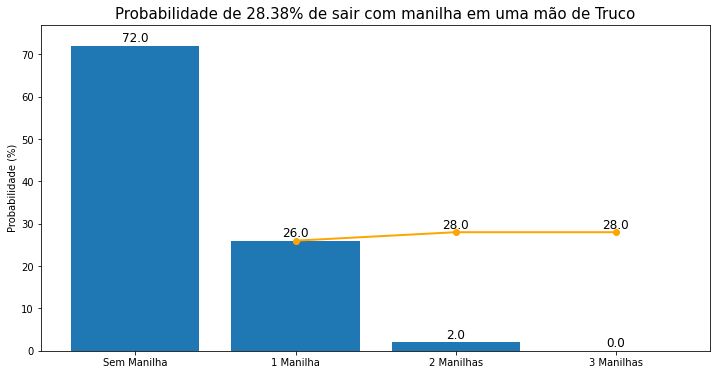

In [116]:
total_cb = comb(usable_cards, cards_per_player)                                                       # Um jogador pode ter (39 3) combinações de mão

no_wildcards_cb = comb(usable_cards - wildcards, cards_per_player)                                    # Mão sem manilha implica que são 35 (39 cartas - 4 manilhas) cartas para 3 espaços
no_wildcards_pb = formatting(no_wildcards_cb / total_cb)                                              # Combinações sem manilha dividido por todas combinações resulta na probabilidade

at_least_1_wildcard_pb = 1 - no_wildcards_pb                                                          # São probabilidades complementares

only_1_wildcard_cb = comb(usable_cards - wildcards, cards_per_player - 1) * comb(wildcards, 1)        # Combinações com 1 manilha vezes o número de manilhas
only_1_wildcard_pb = formatting(only_1_wildcard_cb / total_cb)                                        # Combinações com 1 manilha dividido por todas combinações resulta na probabilidade

only_2_wildcard_cb = comb(usable_cards - wildcards, cards_per_player - 2) * comb(wildcards, 2)        # Combinações com 2 manilhas vezes o número combinações de 2 manilhas
only_2_wildcard_pb = formatting(only_2_wildcard_cb / total_cb)                                        # Combinações com 2 manilhsa dividido por todas combinações resulta na probabilidade

only_3_wildcard_cb = comb(usable_cards - wildcards, cards_per_player - 3) * comb(wildcards, 3)        # Combinações com 3 manilhas vezes o número combinações de 3 manilhas
only_3_wildcard_pb = formatting(only_3_wildcard_cb / total_cb)                                        # Combinações com 3 manilhsa dividido por todas combinações resulta na probabilidade


fig, ax = plt.subplots(1, 1, figsize=(12, 6))                                                         # Definindo área de plotagem

x = ['Sem Manilha', '1 Manilha', '2 Manilhas', '3 Manilhas']                                          # Definindo valores do eixo x do gráfico
y = [no_wildcards_pb, only_1_wildcard_pb, only_2_wildcard_pb, only_3_wildcard_pb]                     # Definindo valores do eixo y do gráfico - barras
y_cum_sum = [sum(y[1:i]) for i in range(2, len(y)+1)]                                                 # Definindo valores do eixo y do gráfico - linha

ax.bar(x, y)                                                                                          # Plotando as barras com as probabilidades
ax.plot(x[1:], y_cum_sum, marker='o', color='orange', linewidth=2)                                    # Plotando a linha com as probabilidades acumuladas

for index in range(len(x)):
  ax.text(x[index], y[index] + 1, y[index], size=12, ha='center')                                     # Plotando texto com os valores das barras

for index in range(1, len(y)-1):
  ax.text(x[index+1], y_cum_sum[index] + 1, y_cum_sum[index], size=12, ha='center')                   # Plotando texto com os valores dos pontos da linha

ax.set_title('Probabilidade de 28.38% de sair com manilha em uma mão de Truco', fontsize=15)          # Definindo título do gráfico
ax.set_ylabel('Probabilidade (%)')                                                                    # Definindo título do eixo y do gráfico
ax.set_ylim(0,77)                                                                                     # Definindo limite do eixo y do gráfico

plt.show()                                                                                            # Mostrando o gráfico

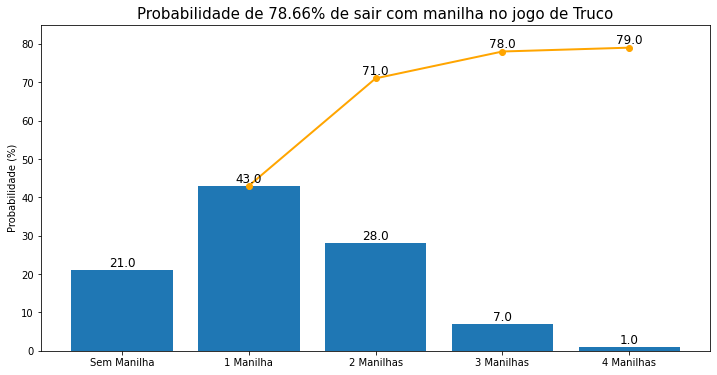

In [117]:
total_cb = comb(usable_cards, playable_cards)                                                         # Um jogador pode ter (39 12) combinações de Jogo

no_wildcards_cb = comb(usable_cards - wildcards, playable_cards)                                      # Jogo sem manilha implica que são 35 (39 - 4 manilhas) cartas para 12 espaços
no_wildcards_pb = formatting(no_wildcards_cb / total_cb)                                              # Combinações sem manilha dividido por todas combinações resulta na probabilidade

at_least_1_wildcard_pb = 1 - no_wildcards_pb                                                          # São probabilidades complementares

only_1_wildcard_cb = comb(usable_cards - wildcards, playable_cards - 1) * comb(wildcards, 1)          # Combinações com 1 manilha vezes o número de manilhas
only_1_wildcard_pb = formatting(only_1_wildcard_cb / total_cb)                                        # Combinações com 1 manilha dividido por todas combinações resulta na probabilidade

only_2_wildcard_cb = comb(usable_cards - wildcards, playable_cards - 2) * comb(wildcards, 2)          # Combinações com 2 manilhas vezes o número combinações de 2 manilhas
only_2_wildcard_pb = formatting(only_2_wildcard_cb / total_cb)                                        # Combinações com 2 manilhsa dividido por todas combinações resulta na probabilidade

only_3_wildcard_cb = comb(usable_cards - wildcards, playable_cards - 3) * comb(wildcards, 3)          # Combinações com 3 manilhas vezes o número combinações de 3 manilhas
only_3_wildcard_pb = formatting(only_3_wildcard_cb / total_cb)                                        # Combinações com 3 manilhsa dividido por todas combinações resulta na probabilidade

only_4_wildcard_cb = comb(usable_cards - wildcards, playable_cards - 4) * comb(wildcards, 4)          # Combinações com 4 manilhas vezes o número combinações de 4 manilhas
only_4_wildcard_pb = formatting(only_4_wildcard_cb / total_cb)                                        # Combinações com 4 manilhsa dividido por todas combinações resulta na probabilidade

fig, ax = plt.subplots(1, 1, figsize=(12, 6))                                                         # Definindo área de plotagem

x = ['Sem Manilha', '1 Manilha', '2 Manilhas', '3 Manilhas', '4 Manilhas']                            # Definindo valores do eixo x do gráfico
y = [no_wildcards_pb, only_1_wildcard_pb, only_2_wildcard_pb, only_3_wildcard_pb, only_4_wildcard_pb] # Definindo valores do eixo y do gráfico - barras
y_cum_sum = [sum(y[1:i]) for i in range(2, len(y)+1)]                                                 # Definindo valores do eixo y do gráfico - linha

ax.bar(x, y)                                                                                          # Plotando as barras com as probabilidades
ax.plot(x[1:], y_cum_sum, marker='o', color='orange', linewidth=2)                                    # Plotando a linha com as probabilidades acumuladas

for index in range(len(x)):
  ax.text(x[index], y[index] + 1, y[index], size=12, ha='center')                                     # Plotando texto com os valores das barras

for index in range(1, len(y)-1):
  ax.text(x[index+1], y_cum_sum[index] + 1, round(y_cum_sum[index], 1), size=12, ha='center')         # Plotando texto com os valores dos pontos da linha

ax.set_title('Probabilidade de 78.66% de sair com manilha no jogo de Truco', fontsize=15)             # Definindo título do gráfico
ax.set_ylabel('Probabilidade (%)')                                                                    # Definindo título do eixo y do gráfico
ax.set_ylim(0,85)                                                                                     # Definindo limite do eixo y do gráfico

plt.show()                                                                                            # Mostrando o gráfico

## Análise Prática

### Code

#### Imports

In [82]:
import pandas as pd                                                                                   # Biblioteca para trabalhar com os dados da simulação
import numpy as np                                                                                    # Biblioteca para trabalhar com os dados da simulação

#### Funções Auxiliares

In [78]:
def create_deck(symbols, suits):                                                                      # Função para criar um deck de baralho
    deck = pd.DataFrame()                                                                             # Uma DataFrame vazia para armazenar as cartas
    deck['symbol'] = symbols * len(suits)                                                             # Multiplicando os símbolos pelo número de naipes
    deck['suit'] = np.sort(suits * len(symbols))                                                      # Multiplicando os naipes pelo número de símbolos
    deck['value'] = [i for i in range(1, len(symbols) + 1)] * len(suits)                              # Convertendo os símbolos para valores e multiplicando pelo número de naipes
    deck['card'] = deck['symbol'] + ' of ' + deck['suit']                                             # Criando uma coluna com o nome da carta
    return deck[['card', 'symbol', 'suit', 'value']]                                                  # Retornando o deck de baralho

def shuffle(deck):                                                                                    # Função para embaralhar o baralho
    return deck.sample(frac=1)                                                                        # Retorna o baralho embaralhado

def set_cards_owners(deck, n_players, n_cards):                                                       # Função que pega o baralho e define quem será o dono de cada carta
    owner = []                                                                                        # Lista vazia que vai armazenar os donos
    for i in range(1, n_players + 1):                                                                
        owner = owner + [f'Player {i}'] * n_cards                                                     # Atribuindo as primeiras cartas aos jogadores
    owner = owner + ['Turned']                                                                        # Definindo a carta virada
    owner = owner + ['Deck'] * (len(deck) - len(owner))                                               # Definindo demais cartas como monte
    deck['owner'] = owner                                                                             # Adicionando a coluna de dono no baralho

def set_card_status(deck, n_players, n_cards):                                                        # Função para definir o status de cada carta
    playable = n_players * n_cards                                                                    # Número de cartas jogáveis
    status = ['Playable'] * (playable) + ['Turned'] + ['Deck'] * (len(deck) - (playable + 1))         # Criando uma lista com o status de cada carta
    deck['status'] = status                                                                           # Adicionando uma coluna com o status de cada carta

def set_wildcards(deck):                                                                              # Função para definir as manilhas do baralaho
    turned_value = deck[deck['owner'] == 'Turned']['value'].iloc[0]                                   # Pegando o valor da carta virada
    if turned_value == 10:                                                                            # Validando se não é o maior valor de carta
        wildcard_value = 1                                                                            # Caso seja o maior valor de carta, a manilha vira a menor carta
    else:
        wildcard_value = turned_value + 1                                                             # Caso não seja o maior valor de carta, a manilha vira o próximo valor
    deck['wildcard'] = deck['value'].map(lambda x: 1 if x == wildcard_value else 0)                   # Definindo coluna com uma flag de identificação de manilha

#### Simulação

In [119]:
symbols = ['4', '5', '6', '7', 'Q', 'J', 'K', 'A', '2', '3']                                          # Definindo os símbolos usados em um jogo
suits = ['Diamonds', 'Spades', 'Hearts', 'Clubs']                                                     # Definindo os naipes usados em um jogo
n_players = 4                                                                                         # Definindo o número de jogadores
n_hand = 3                                                                                            # Definindo o número de cartas por jogador 

status = {                                                                                            # Dicionário que vai armazenar o resultado de cada simulação
    'playable': [],                                                                                   # Lista que vai armazenar a quantidade de manilhas jogáveis
    'non_playable': []                                                                                # Lista que vai armazenar a quantidade de manilhas não jogáveis
}

for i in range(0, n_players):                                                                         
    status[f'Player {i + 1}'] = []                                                                    # Listas que vão armazenar a quantidade de manilhas de cada jogador

for i in range(0, 500000):                                                                            # Loop responsável por rodar várias simulações                
    deck = shuffle(create_deck(symbols=symbols, suits=suits))                                         # Criando um deck de cartas e já retornando embaralhado
    set_cards_owners(deck, n_players, n_hand)                                                         # Definindo o dono de cada carta
    set_card_status(deck, n_players, n_hand)                                                          # Definindo o status de cada carta
    set_wildcards(deck)                                                                               # Definindo as manilhas

    status['playable'].append(deck[deck['status'] == 'Playable']['wildcard'].sum())                   # Armazenando o número de manilhas jogáveis
    status['non_playable'].append(deck[deck['status'] == 'Deck']['wildcard'].sum())                   # Armazenando o número de manilhas não jogáveis

    for i in range(0, n_players):
        status[f'Player {i+1}'].append(deck[deck['owner'] == f'Player {i+1}']['wildcard'].sum())      # Armazenando o número de manilhas de cada jogador

#### Análise

In [127]:
df = pd.DataFrame(status)                                                                             # Criando DataFrame com os resultados das simulações

probabilities = pd.DataFrame()                                                                        # Criando DataFrame para armazenar as probabilidades

for col in df.columns:                                                                                # Salvando os dados das probabilidades na DataFrame por meio de concatenações
    probabilities = pd.concat(
        [
            probabilities, 
            df[col].value_counts(normalize=True).map(formatting)                                      # Value counts retorna as probabilidades
        ], axis=1)

probabilities.columns = ['In Game', 'In Deck', 'Player 1', 'Player 2', 'Player 3', 'Player 4']        # Renomeando as colunas
probabilities.index.name = 'Qtd. Manilhas'                                                            # Renomeando o índice

print('Probabilidade de manilha por categoria:')                                                      # Apresentando os resultados da simulação
probabilities

Probabilidade de manilha por categoria:


,In Game,In Deck,Player 1,Player 2,Player 3,Player 4
Qtd. Manilhas,,,,,,
0,21.0,1.0,72.0,72.0,72.0,72.0
1,43.0,7.0,26.0,26.0,26.0,26.0
2,28.0,28.0,2.0,2.0,2.0,2.0
3,7.0,43.0,0.0,0.0,0.0,0.0
4,1.0,21.0,NaN,NaN,NaN,NaN
